## import del dataset

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [102]:
data = pd.read_csv("./marziani.csv")

data

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,viola,20.000,3.870,14.770,73.220
1,Robby,viola,27.000,3.150,28.190,88.440
2,Robby,viola,25.000,4.350,12.050,76.740
3,Robby,blu,20.000,3.760,9.900,81.370
4,Robby,blu,28.000,2.860,19.870,84.650
...,...,...,...,...,...,...
1995,Simmy,viola,29.000,4.550,35.480,68.470
1996,Simmy,blu,23.000,3.840,29.860,71.510
1997,Simmy,viola,22.000,4.550,29.410,68.380
1998,Simmy,rosso,27.000,4.530,33.120,68.100


In [103]:
data.dtypes

specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object

In [104]:
print(data["specie"].unique())

['Robby' 'Simmy']


In [105]:
print(data["specie"].describe())

count      2000
unique        2
top       Robby
freq       1000
Name: specie, dtype: object


In [106]:
for s in data["specie"].unique():
    dati = data[data["specie"] == s]
    print(s)

    for x in data.columns[1:]:
        print(data[x].describe())

    print("\n")

Robby
count     1993
unique       3
top        blu
freq       674
Name: colore, dtype: object
count   1994.000
mean      24.591
std        2.891
min       20.000
25%       22.000
50%       25.000
75%       27.000
max       29.000
Name: n_arti, dtype: float64
count   2000.000
mean       3.996
std        0.706
min        2.130
25%        3.470
50%        3.990
75%        4.530
max        6.110
Name: peso, dtype: float64
count   1995.000
mean      25.155
std        9.148
min        3.170
25%       17.330
50%       24.020
75%       32.645
max       49.750
Name: altezza, dtype: float64
count   1997.000
mean      77.484
std       11.120
min       44.700
25%       69.440
50%       73.550
75%       84.890
max      117.450
Name: larghezza, dtype: float64


Simmy
count     1993
unique       3
top        blu
freq       674
Name: colore, dtype: object
count   1994.000
mean      24.591
std        2.891
min       20.000
25%       22.000
50%       25.000
75%       27.000
max       29.000
Name: n_arti

In [107]:
colori = data["colore"].unique()

print(colori)

['viola' 'blu' 'rosso' nan]


In [108]:
colori = np.sort(data["colore"].dropna().unique())
print(colori)

d = data.copy()

for k in range(len(colori)):
    d["colore"].replace(colori[k], k, inplace= True)

print(d.head())

['blu' 'rosso' 'viola']
  specie  colore  n_arti  peso  altezza  larghezza
0  Robby   2.000  20.000 3.870   14.770     73.220
1  Robby   2.000  27.000 3.150   28.190     88.440
2  Robby   2.000  25.000 4.350   12.050     76.740
3  Robby   0.000  20.000 3.760    9.900     81.370
4  Robby   0.000  28.000 2.860   19.870     84.650


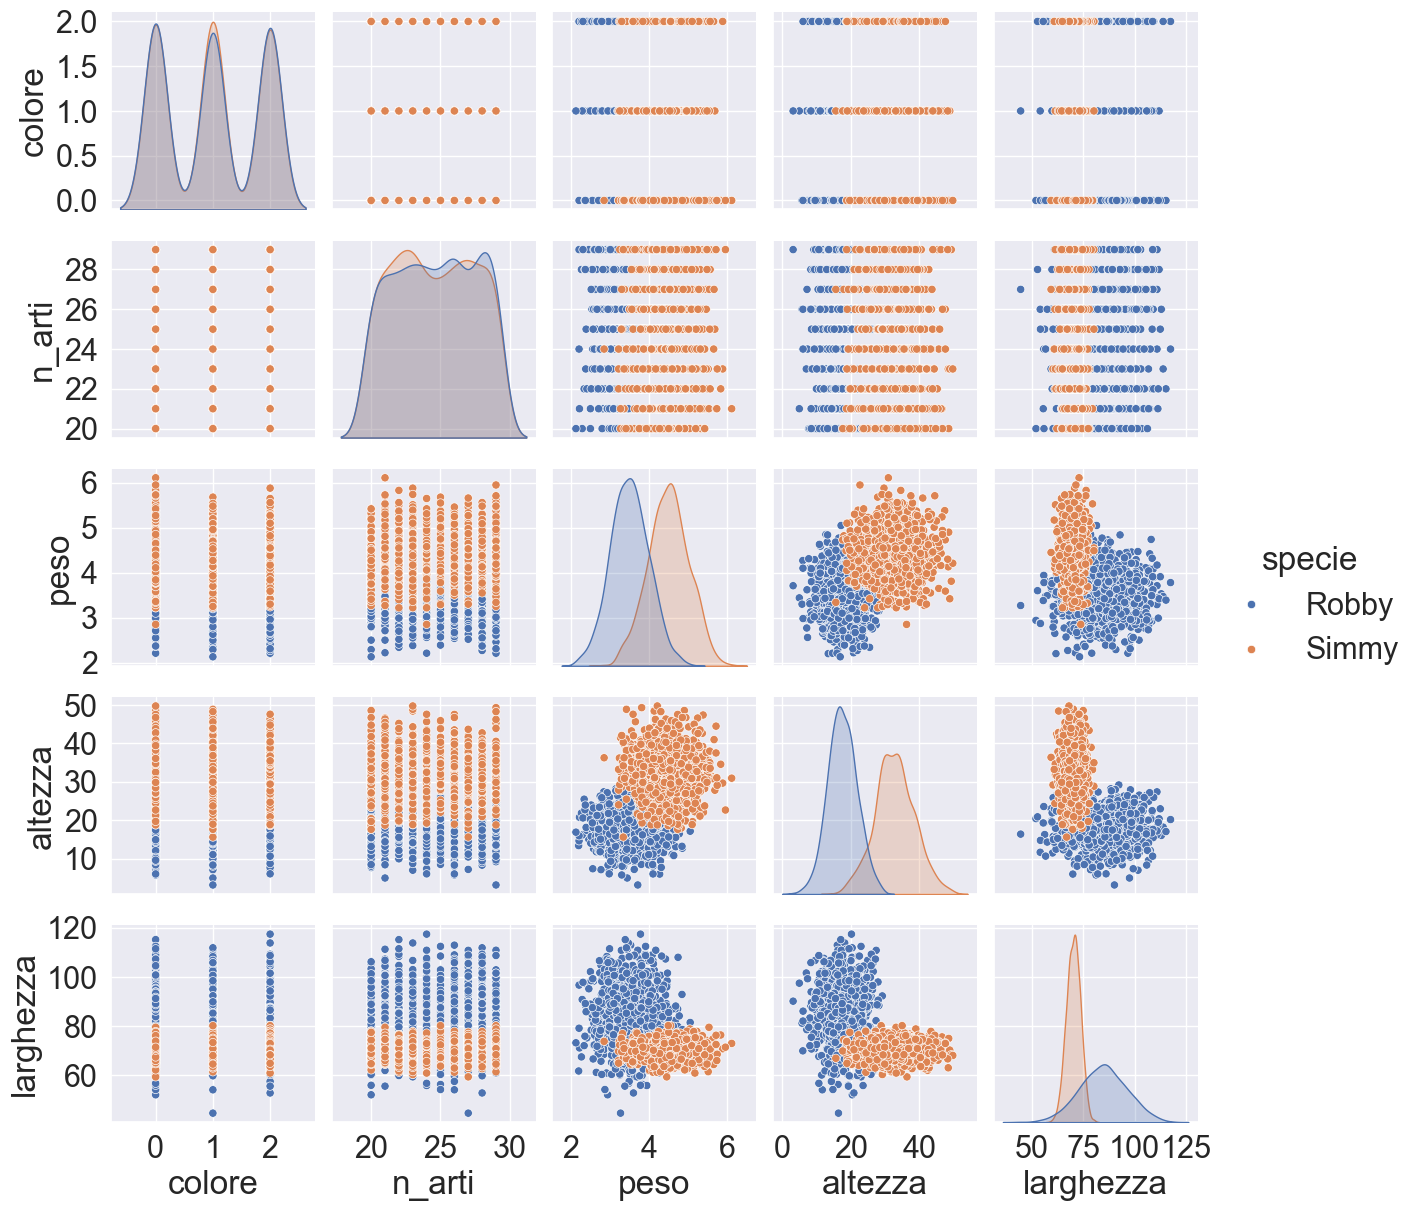

In [109]:
sns.set_theme(font_scale= 2)
sns.pairplot(d, hue="specie", dropna = True)
sns.set()

In [110]:
col_missing = [col for col in d.columns if d[col].isnull().sum()]

print(col_missing)

['colore', 'n_arti', 'altezza', 'larghezza']


In [111]:
col_selected = ["peso", "altezza", "larghezza"]
d = data.dropna(axis = "index", subset= col_selected)

print(d.shape)

(1992, 6)


In [112]:
x = d[col_selected]
y = d["specie"]

print(x.head())
print(y.head())

   peso  altezza  larghezza
0 3.870   14.770     73.220
1 3.150   28.190     88.440
2 4.350   12.050     76.740
3 3.760    9.900     81.370
4 2.860   19.870     84.650
0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7, random_state= 0) 

print(X_train.head())

      peso  altezza  larghezza
1853 4.580   29.130     70.590
486  3.930   25.370     95.300
846  3.950   27.270     73.860
376  3.010   21.950     74.950
580  3.170   12.020     76.470


In [114]:
pd.options.display.float_format = "{:.3f}".format

m = X_train.mean()
s = X_train.std()

X_train_std = ((X_train -  m)/ s)
print(X_train_std.describe())

          peso  altezza  larghezza
count 1394.000 1394.000   1394.000
mean     0.000   -0.000     -0.000
std      1.000    1.000      1.000
min     -2.536   -2.410     -2.297
25%     -0.742   -0.863     -0.724
50%     -0.007   -0.117     -0.360
75%      0.755    0.846      0.667
max      2.988    2.572      3.444


peso
altezza
larghezza


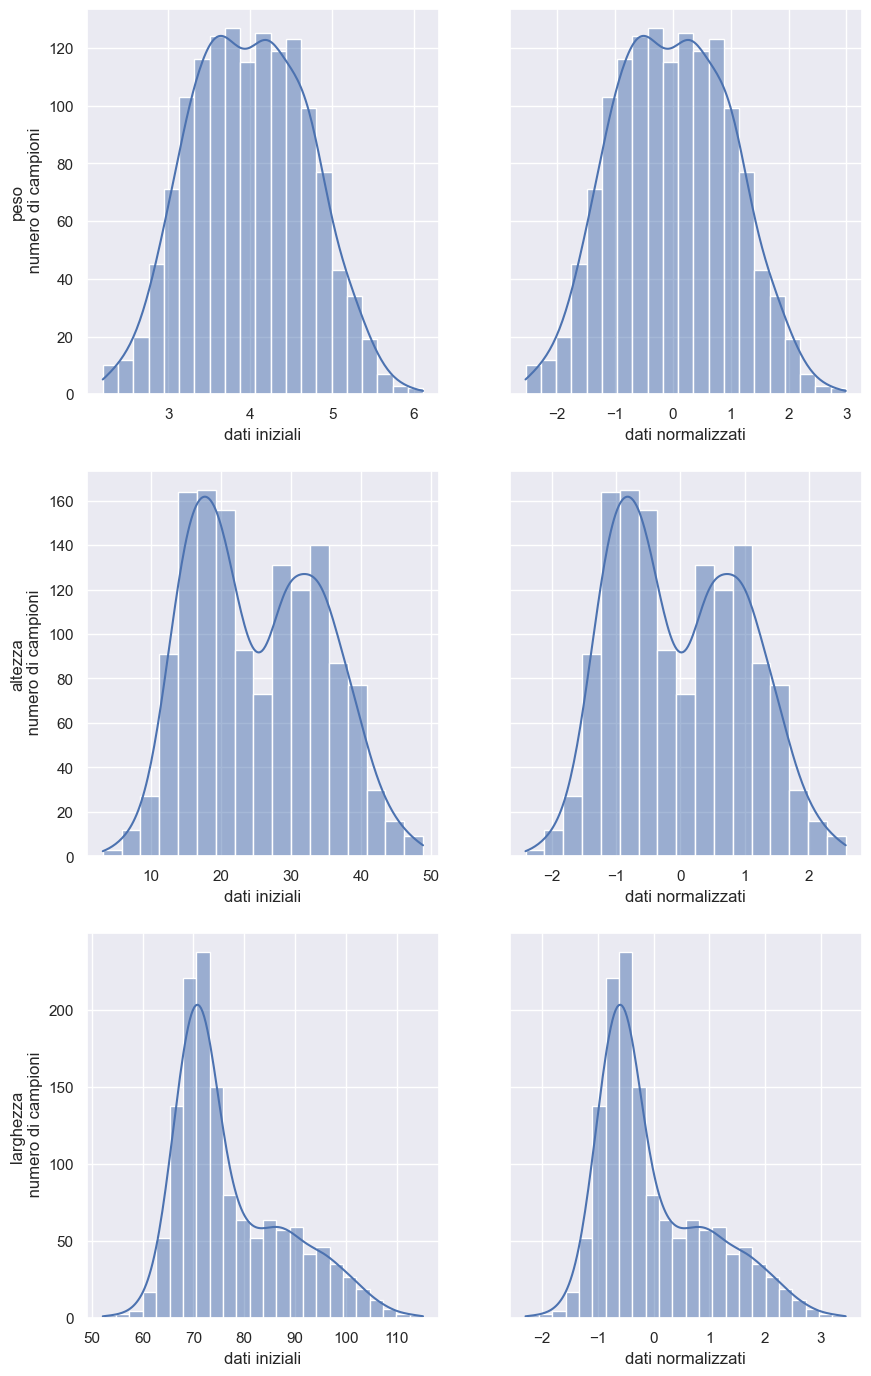

In [115]:
fig, axes = plt.subplots(3, 2, figsize=(10,17), sharey='row')

for i, ax in enumerate(axes):
    col = col_selected[i]
    print(col)

    ax[0].set_xlabel("dati iniziali")
    ax[1].set_xlabel("dati normalizzati")
    ax[0].set_ylabel(f"{col}\n numero di campioni")

    sns.histplot(ax=ax[0], x=X_train[col], kde = True)
    sns.histplot(ax=ax[1], x=X_train_std[col], kde = True)
sns.set()

In [116]:
m = X_test.mean()
s = X_test.std()

X_test_std = ((X_test -  m)/ s)
print(X_test_std.describe())

         peso  altezza  larghezza
count 598.000  598.000    598.000
mean    0.000   -0.000     -0.000
std     1.000    1.000      1.000
min    -2.665   -1.945     -2.900
25%    -0.750   -0.839     -0.720
50%    -0.013   -0.129     -0.353
75%     0.748    0.797      0.653
max     2.410    2.749      3.499


In [117]:
model = MLPClassifier(hidden_layer_sizes=(100, 100),random_state= 1, max_iter= 300)

In [118]:
model.fit(X_train_std, Y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=1)

In [119]:
print(f"""
Train
{Y_train.values[:5]}
{model.predict(X_train_std[:5])}   
      
    """)


Train
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']   
      
    


In [121]:
print(f"Accuratezza set TRAIN: {model.score(X_train_std, Y_train)}")
print(f"Accuratezza set TRAIN: {model.score(X_test_std, Y_test)}")

Accuratezza set TRAIN: 0.9835007173601148
Accuratezza set TRAIN: 0.9732441471571907


c:\Users\Lorena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lorena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lorena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lorena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the 

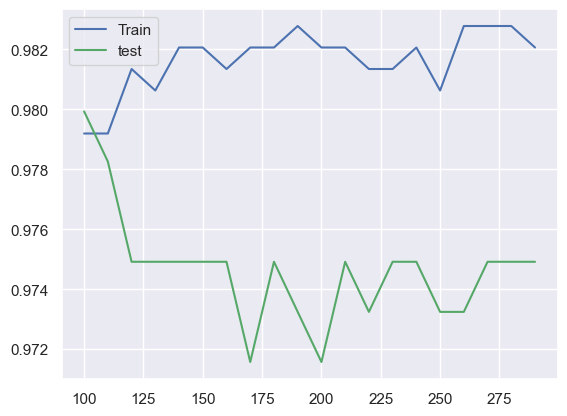

In [122]:
start = 100
stop = 300
passo = 10

vEpochs = np.arange(start, stop, passo)
vAccTrain = []
vAccTest = []

for e in vEpochs:
    mlp = MLPClassifier(hidden_layer_sizes = (100,100), random_state = 1, max_iter = e)
    mlp.fit(X_train_std,Y_train)
    vAccTrain.append(mlp.score(X_train_std, Y_train))
    vAccTest.append(mlp.score(X_test_std, Y_test))

import matplotlib.pyplot as plt
plt.plot(vEpochs, vAccTrain, c="b", label="Train")
plt.plot(vEpochs, vAccTest, c="g", label="test")
plt.legend()